In [1]:
import pandas as pd
import numpy as np 

In [2]:
from statsmodels.compat import lzip    # 전통적인 통계모from statsmodels.compat import lzip    # 전통적인 통계모델 라이브러리
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor  # 다중공선성 check 델 라이브러리
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor  # 다중공선성 check 

In [477]:
np.log(5)

1.6094379124341003

In [474]:
df['x7_log'] = np.log(df['y'])

C:\Users\limsun\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='x7', ylabel='x7_log'>

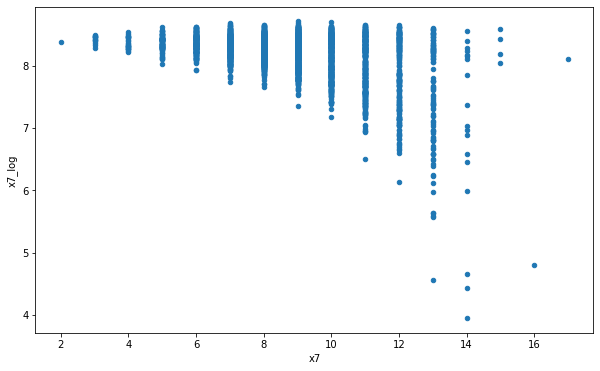

In [475]:
df.plot('x7','x7_log',kind='scatter')

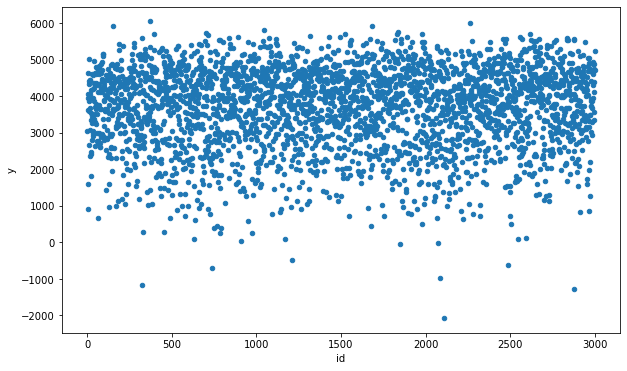

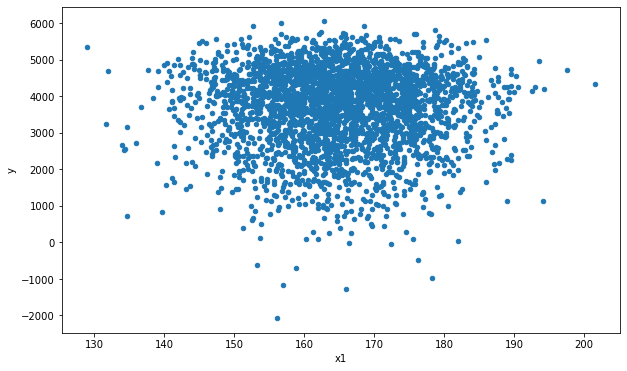

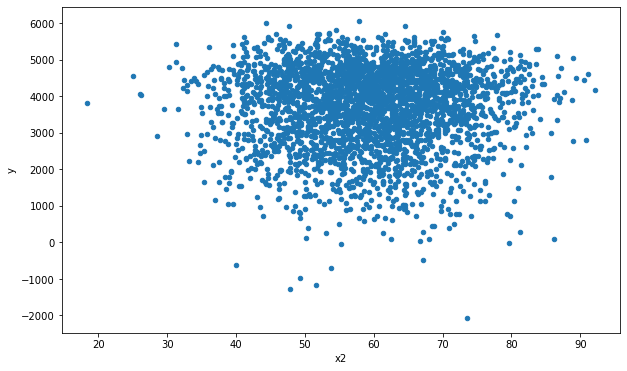

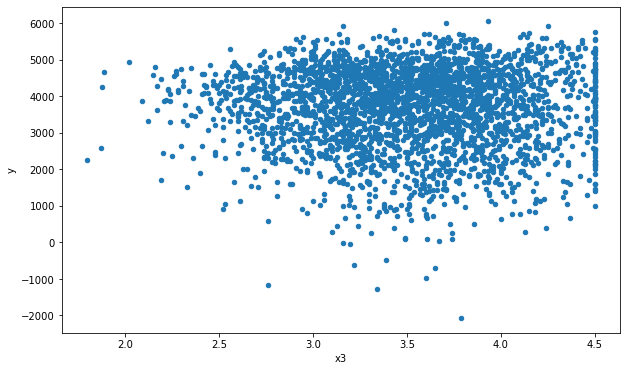

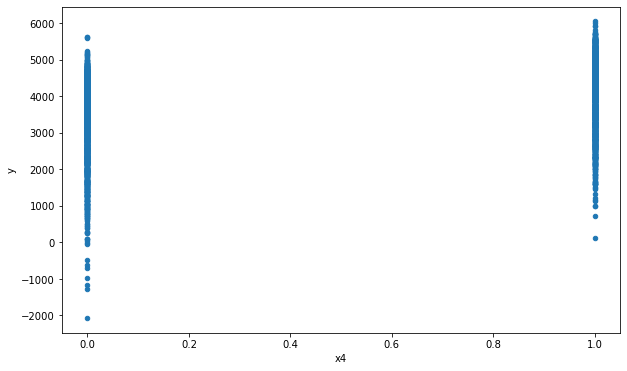

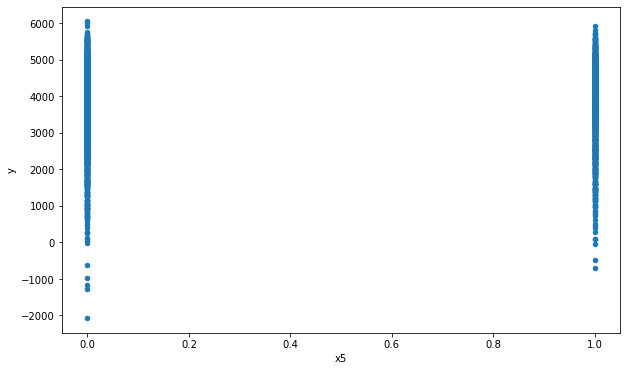

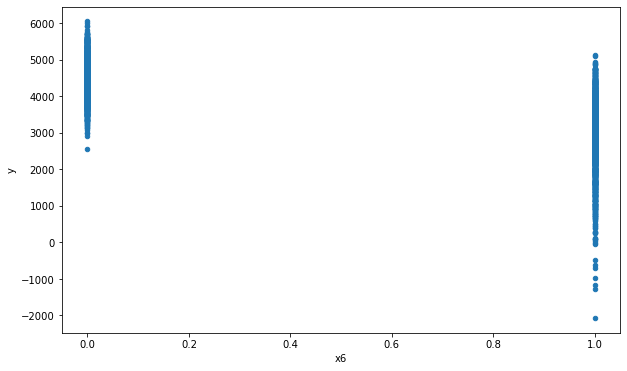

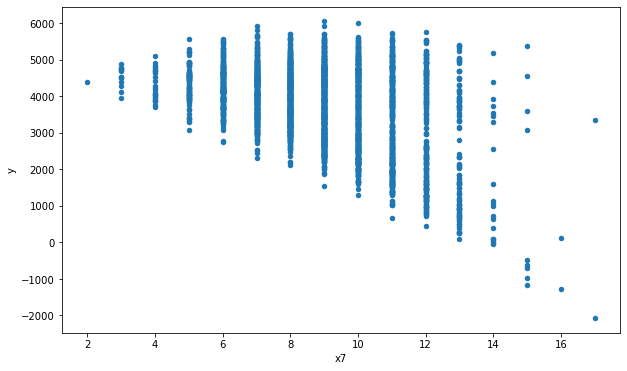

In [469]:
for i in df.columns[:-1] : 
    df.plot(i,'y',kind='scatter')
    plt.show()

In [ ]:
1. x1~x7의 회귀계수 (베타값) 구하기 
   --> (XtX)-1*Xt*y식 이용.
   --> x1~x7에 대한 값 데이터를 matrix로 표현해서 --> 트렌스퍼, 역행렬 구현 ]

2. 계수값에 대한 유의성 파악 
2-1 . x1~x7의 표준 오차 구하기 
2-2 . t value = 계수/표준 오차 
2-3 . 해당 t-value에 대한 p-value 구하기 [ 자유도 = n-1(절편)-(독립변수의 수) = n-8 ] 

In [ ]:
더 필요한거 
이상치 제거
LOG? 
정규화  --> 단위가 다 다름 MIN-MAX 


In [408]:
df = pd.read_csv('test.csv')

# For calculate Betas 

## (X.T * X )inverse * X.T * Y 

In [409]:
beta_0 = [1] * 3000

In [410]:
Y = np.array([df['y']]).T

In [411]:
X = np.array([beta_0,df['x1'],df['x2'],df['x3'],df['x4'],df['x5'],df['x6'],df['x7']]).T

In [412]:
Xt_X = (X.T).dot(X)

In [413]:
Xt_X_inverse = np.linalg.inv(Xt_X)

In [414]:
Betas = (Xt_X_inverse.dot(X.T)).dot(Y)

In [428]:
pd.DataFrame(Betas)

,0
0,"5,681.46"
1,0.21
2,0.34
3,119.90
4,682.68
5,34.48
6,"-1,525.53"
7,-223.88


In [416]:
sse = (Y.T).dot(Y) - ((Betas.T).dot(X.T)).dot(Y)  # another method _ for calculate SSE _ 

In [417]:
S=(sse/(3000-1-7))**0.5   # 회귀식의 표준편차 

In [426]:
# SE를 구하기 위해 필요한 Cii 

def cal_c(i) : 
    a=np.array([[0],[0],[0],[0],[0],[0],[0],[0]])
    a[i]=1
    c = ((a.T).dot(Xt_X_inverse)).dot(a)     # C 계산 
    return c

In [431]:
# SE를 구하기위한 최종 함수 
def cal_SE(c,S) : 
    return S*(c**0.5)

In [447]:
standard_error =[]

print(*cal_SE(cal_c(0),S))
standard_error.append(float(cal_SE(cal_c(0),S)))
print(*cal_SE(cal_c(1),S))
standard_error.append(float(cal_SE(cal_c(1),S)))
print(*cal_SE(cal_c(2),S))
standard_error.append(float(cal_SE(cal_c(2),S)))
print(*cal_SE(cal_c(3),S))
standard_error.append(float(cal_SE(cal_c(3),S)))
print(*cal_SE(cal_c(4),S))
standard_error.append(float(cal_SE(cal_c(4),S)))
print(*cal_SE(cal_c(5),S))
standard_error.append(float(cal_SE(cal_c(5),S)))
print(*cal_SE(cal_c(6),S))
standard_error.append(float(cal_SE(cal_c(6),S)))
print(*cal_SE(cal_c(7),S))
standard_error.append(float(cal_SE(cal_c(7),S)))

[184.2529835]
[1.03943784]
[0.97831049]
[21.3485099]
[19.78304805]
[21.11947093]
[19.73972609]
[4.88391913]


In [452]:
calc_data = pd.DataFrame(Betas,columns=['beta'])

In [455]:
calc_data['standard_error'] = standard_error

In [457]:
calc_data['t_value'] = calc_data['beta'] /calc_data['standard_error'] 

In [458]:
calc_data

,beta,standard_error,t_value
0,"5,681.46",184.25,30.84
1,0.21,1.04,0.20
2,0.34,0.98,0.35
3,119.90,21.35,5.62
4,682.68,19.78,34.51
5,34.48,21.12,1.63
6,"-1,525.53",19.74,-77.28
7,-223.88,4.88,-45.84


In [343]:
linear_data = df.copy() 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 

# 민 멕스와 스텐다드 클레스를 임포트 해왔음 --> 해당 인스턴스를 만들어서 변수에 넣고 그것을 사용하겠다고 선언 해줌.
scaler_minmax = MinMaxScaler()
#scaler_standard = StandardScaler()

scaler_minmax.fit(linear_data[['x1','x2','x3','x4','x5','x6','x7']])
#scaler_standard.fit(linear_data[['x1']])
# x_train data를 기준으로 스케일러 민-멕스의 기준에 핏 --> train 데이터를 기반으로 각 컬럼별 최소값 0이 될 값은 뭐일지 

MinMaxScaler()

In [344]:
x_scaled_minmax_train = scaler_minmax.transform(linear_data[['x1','x2','x3','x4','x5','x6','x7']])
#x_scaled_standard_train = scaler_standard.transform(linear_data[['x1']])

# 위에서 세운 민 멕스 시케일 기준을 토대로, 실제 x train값을 각 컬럼별로 -- 조건에 맞게 정규화 변환 실시 --> 해당 data를 새 변수에 넣어줌 
x_scaled_minmax_train.shape
#x_scaled_standard_train

(3000, 7)

C:\Users\limsun\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1378.
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        16:27:35   Log-Likelihood:                -23123.
No. Observations:                3000   AIC:                         4.626e+04
Df Residuals:                    2992   BIC:                         4.631e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5681.4637    184.253     30.835      0.0

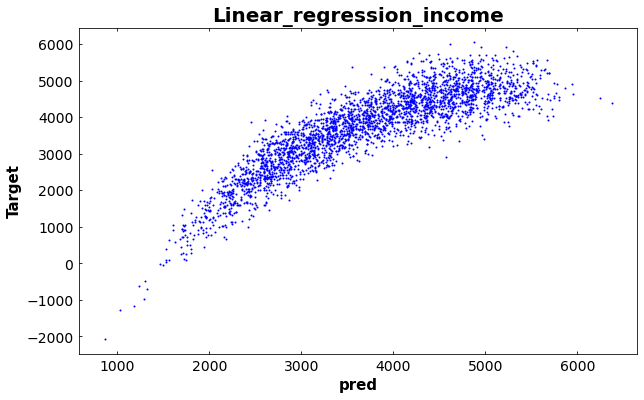

In [485]:
import matplotlib.pyplot as plt
linear_data = df.copy()

Y = linear_data['y'] 
X = linear_data[['x1','x2','x3','x4','x5','x6','x7']] # reg_data[[0,1,2,3,4,5,6]] 
X =sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()

print(result.summary())

plt.rcParams["figure.figsize"] = (10,6)
plt.scatter(x=result.predict(X), y=Y, s=1, color='blue')
plt.title('Linear_regression_income',size=20,weight='bold')
plt.xlabel('pred',weight='bold',color='black',size=15)
plt.ylabel('Target',weight='bold',color='black',size=15)
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)  
plt.show()

In [72]:
df['x1']=x_scaled_minmax_train

In [153]:
df

,id,x1,x2,x3,x4,x5,x6,x7,y
0,1,178.39999,56.900002,3.19,0,0,1,7,3043
1,2,169.60001,70.800003,2.52,0,0,1,13,907
2,3,163.50000,64.699997,3.18,1,0,1,12,1592
3,4,158.50000,54.299999,4.14,0,0,1,8,3638
4,5,159.70000,56.799999,3.80,1,0,0,12,4641
...,...,...,...,...,...,...,...,...,...
2995,2996,171.20000,51.200001,4.50,1,0,1,10,3351
2996,2997,148.39999,65.099998,3.74,0,1,0,12,4119
2997,2998,171.80000,63.400002,3.71,0,0,1,5,4406
2998,2999,159.39999,66.099998,3.73,1,0,0,9,5244


In [75]:
df['x1_mean']=np.mean(df['x1'])

In [84]:
np.std(df['x1'])/3000**0.5

0.0024919848413887053

In [77]:
df['x1_mean-x1(편차)'] = (df['x1_mean']-df['x1'])
df['x1_mean-x1_**(편차제곱)'] = (df['x1_mean-x1(편차)'] )**2

In [47]:
df.columns

Index(['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'y', 'x1_mean',
       'x1_mean-x1(편차)', 'x1_mean-x1_**(편차제곱)'],
      dtype='object')

In [64]:
df[['x1','x1_mean','x1_mean-x1(편차)', 'x1_mean-x1_**(편차제곱)']]

,x1,x1_mean,x1_mean-x1(편차),x1_mean-x1_**(편차제곱)
0,178.39999,164.752334,-13.647656,186.258525
1,169.60001,164.752334,-4.847676,23.499967
2,163.50000,164.752334,1.252334,1.568339
3,158.50000,164.752334,6.252334,39.091675
4,159.70000,164.752334,5.052334,25.526075
...,...,...,...,...
2995,171.20000,164.752334,-6.447666,41.572402
2996,148.39999,164.752334,16.352344,267.399141
2997,171.80000,164.752334,-7.047666,49.669602
2998,159.39999,164.752334,5.352344,28.647582


In [79]:
(sum(df['x1_mean-x1_**(편차제곱)']))

55.889896047399816

In [80]:
(sum(df['x1_mean-x1_**(편차제곱)']))**0.5/3000**0.5

0.13649163105895273

In [81]:
((sum(df['x1_mean-x1_**(편차제곱)']))**(1/2))/(3000**(1/2))  # --> 편차 제곱 합의 루트/n  --> 표준 오차 

0.13649163105895273